# **Black Travel/Living in America**
### _The Final Report_
<hr>

<img src="coverimage.png"/>

## Executive Summary

Using population data from two main sources, we strived to analyze and project the movements of Black people in America in order to address questions such as: What are some of the most important factors that impact the percentage of Black people in each state in America using data that we have of where Black people are right now, and how will those trends look in the coming years? Our dataset allowed us to create an interactive visual that illustrated the movement of Black people over time and using our eventual machine learning tools (linear regression, LASO, and feature importance), we were able to project that visual all the way out to 2050 for four bookmark states in America (California, Massachusetts, Ohio, and Texas). A few things we picked up during this process were:
- States in the Southeast had some of the highest Black population percentages which aligns in that they are historically Black settling places.
- We also saw continued trends of low Black population in historically white states (multiple states in the Midwest)

 The project proved to be increasingly complex coupled with the contextualization of the housing crisis and disparities that people of color unjustly excessively face. 

<hr>

## Introduction

Our project aims to analyze where Black people in the U.S. will migrate to in the coming years in relation to where they were in the past.
This provokes important questions such as: is this where black people actually want to be living?
<br><br>
The concept of this project was inspired by the "Negro Motorist Green Book", which informed Black travelers about hotels, restaurants, barber shops, and other things Black people needed when traveling from state to state. But even more than that, as a group of all Black women, it is imperative that we are able to predict the future of Black movement, _our_ movement, and for us to promote conversations about the effects of history on our future and what those implications may be for generations to come.
<br><br>
The implication of Black history in America dates back to Jim Crow Laws and are still responsible for the segregation between Black people and white people in the United States today. Our project is attempting to take a look into the future, using a polynomial regression to predict where the Black population will be in the coming years. It will also allow us to analyse what features are responsible for the change in Black population percentage per state. 

## Motivating sources 
[National Geographic: Black Travel Across America](https://www.nationalgeographic.com/tv/movies-and-specials/black-travel-across-america)


[The Travel History of Black America](https://www.coastlinetravel.com/the-travel-history-of-black-america/)


[Why Thes Professors Helped Create a "History of Black Travel Timeline](https://www.cntraveler.com/story/why-these-professors-helped-create-a-history-of-black-travel-timeline)

<hr>

## Data Description

### Data Description: Dictionaries

In [1]:
import pandas as pd

# loading in data
df_pop = pd.read_csv('percent_black_over_time.csv')

# cleaning up data
# removing %
df_pop = df_pop.iloc[:, :].replace({'%': ''}, regex=True)

# replacing missing data with data from the previous year
df_pop.fillna(method='ffill', inplace=True)

# changing values to floats
df_pop = df_pop.iloc[:,:].astype(float)

df_pop.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1790.0,NaN,NaN,NaN,NaN,NaN,NaN,2.3,21.6,NaN,...,NaN,10.6,NaN,NaN,0.3,43.4,NaN,9.5,NaN,NaN
1,1800.0,41.4,NaN,NaN,NaN,NaN,NaN,2.5,22.4,30.4,...,NaN,13.2,NaN,NaN,0.4,44.6,NaN,9.8,NaN,NaN
2,1810.0,29.0,NaN,NaN,13.0,NaN,NaN,2.6,23.8,33.1,...,NaN,17.5,NaN,NaN,0.3,47.1,NaN,11.5,NaN,NaN
3,1820.0,33.2,NaN,NaN,11.7,NaN,NaN,2.9,24.0,31.2,...,NaN,19.6,NaN,NaN,0.4,47.8,NaN,12.1,1.2,NaN
4,1830.0,38.5,NaN,NaN,15.5,NaN,NaN,2.7,24.9,30.1,...,NaN,21.4,NaN,NaN,0.3,47.9,NaN,11.2,1.8,NaN


In [2]:
reformatted_pb_dict = {
    "State/territory": "abbereviation of U.S. states",
    "Year": "year the data was collected ",
    "Population Percentage" : "percentage of the black population in that state, that year"
     }

print("")
for key, val in reformatted_pb_dict.items():
    print(f"Feature: {key}")
    print(f"Description: {val}")
    print("----------------------------------")


Feature: State/territory
Description: abbereviation of U.S. states
----------------------------------
Feature: Year
Description: year the data was collected 
----------------------------------
Feature: Population Percentage
Description: percentage of the black population in that state, that year
----------------------------------


In [3]:
df_state_demo = pd.read_csv("state_demographics.csv")
df_state_demo.head()

,State,Population.Population Percent Change,Population.2014 Population,Population.2010 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Miscellaneous.Percent Female,Ethnicities.White Alone,Ethnicities.Black Alone,...,Employment.Nonemployer Establishments,Employment.Firms.Total,Employment.Firms.Men-Owned,Employment.Firms.Women-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,Population.Population per Square Mile,Miscellaneous.Land Area
0,Connecticut,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,...,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
1,Delaware,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,...,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
2,District of Columbia,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,...,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
3,Florida,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,...,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
4,Georgia,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,...,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49


In [4]:
# definitions provided for features we will be using
state_demographic_dict = {"state": "name of U.S. state",
                           "Population.PopulationPercentChange": "Change in population percentage between 2014 and 2012",
                         "Population.2014Population": "population  in 2014",
                         "Population.2010POpulation" : "population  in 2010",
                         "Age.PercentUnder5Years": "percentage of people under the age of of 5",
                         "Age.PercenUnder18Years": "percentage of people under the age of 18",
                         "Age.Percent65andOlder": "percentage of people over the ages of 65",
                         "Miscellaneous.PercentFemale": "percent of women",
                        "Ethnicities.BlackAlone": "percent of the population that is black",
                          "Employment.NonemployerEstablishments": "Number of establishments without paid employees",
                          "Emplotment.Firms.Total": "Number of employment firms ",
                          "Employment.Firms.Men-Owned": "businesses owned by men ",
                          "Employment.Firms.Women-Owned": "businesses ownded by women ",
                          "Employment.Firms.Minority-Owned": "businesses owned by minorities",
                          "Employment.Firms.Nonminority-Owned": "businesses owned by white people",
                          "Employment.Firms.Veteran-Owned" : "businesses owned by veterans ",
                          "Employment.Firms.NonVeteran-Owned": "Firms owned by people who are not veterans",
                          "Population.PopulationperSquareMile": "Population per suqare mile",}

print("")                                            
print("Definitions provided for features we will be using")
for key, val in state_demographic_dict.items():
    print(f"Feature: {key}")
    print(f"Description: {val}")
    print("----------------------------------")


Definitions provided for features we will be using
Feature: state
Description: name of U.S. state
----------------------------------
Feature: Population.PopulationPercentChange
Description: Change in population percentage between 2014 and 2012
----------------------------------
Feature: Population.2014Population
Description: population  in 2014
----------------------------------
Feature: Population.2010POpulation
Description: population  in 2010
----------------------------------
Feature: Age.PercentUnder5Years
Description: percentage of people under the age of of 5
----------------------------------
Feature: Age.PercenUnder18Years
Description: percentage of people under the age of 18
----------------------------------
Feature: Age.Percent65andOlder
Description: percentage of people over the ages of 65
----------------------------------
Feature: Miscellaneous.PercentFemale
Description: percent of women
----------------------------------
Feature: Ethnicities.BlackAlone
Description: per

### Data Description: Visualizations

#### Visualization for Dataset 1

Text(50.722222222222214, 0.5, 'Year')

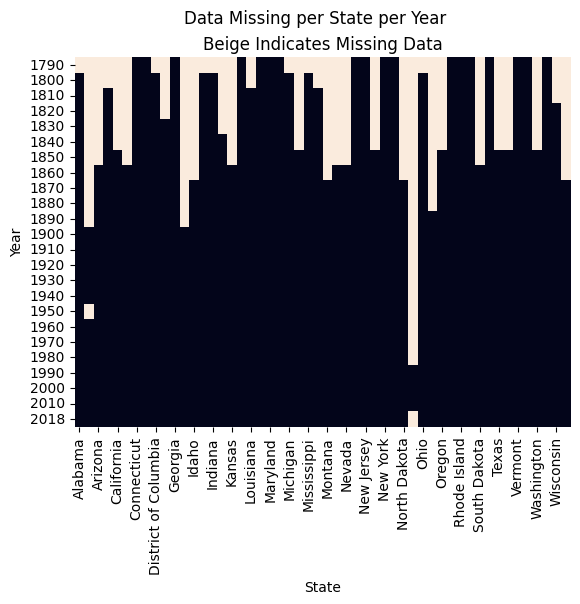

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# reloading the dataset without filling/replacing NaN values
df_pop2 = pd.read_csv('percent_black_over_time.csv')
del df_pop2['Year']

# creating 'heatmap'
hmap = sns.heatmap(df_pop2.isnull(), cbar=False)
hmap.set_yticklabels(['1790', '1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870',
                     '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960',
                     '1970', '1980', '1990', '2000', '2010', '2018'])

# labelling
plt.suptitle("Data Missing per State per Year")
plt.title("Beige Indicates Missing Data")
plt.xlabel("State")
plt.ylabel("Year")


#### Visualization for Dataset 2

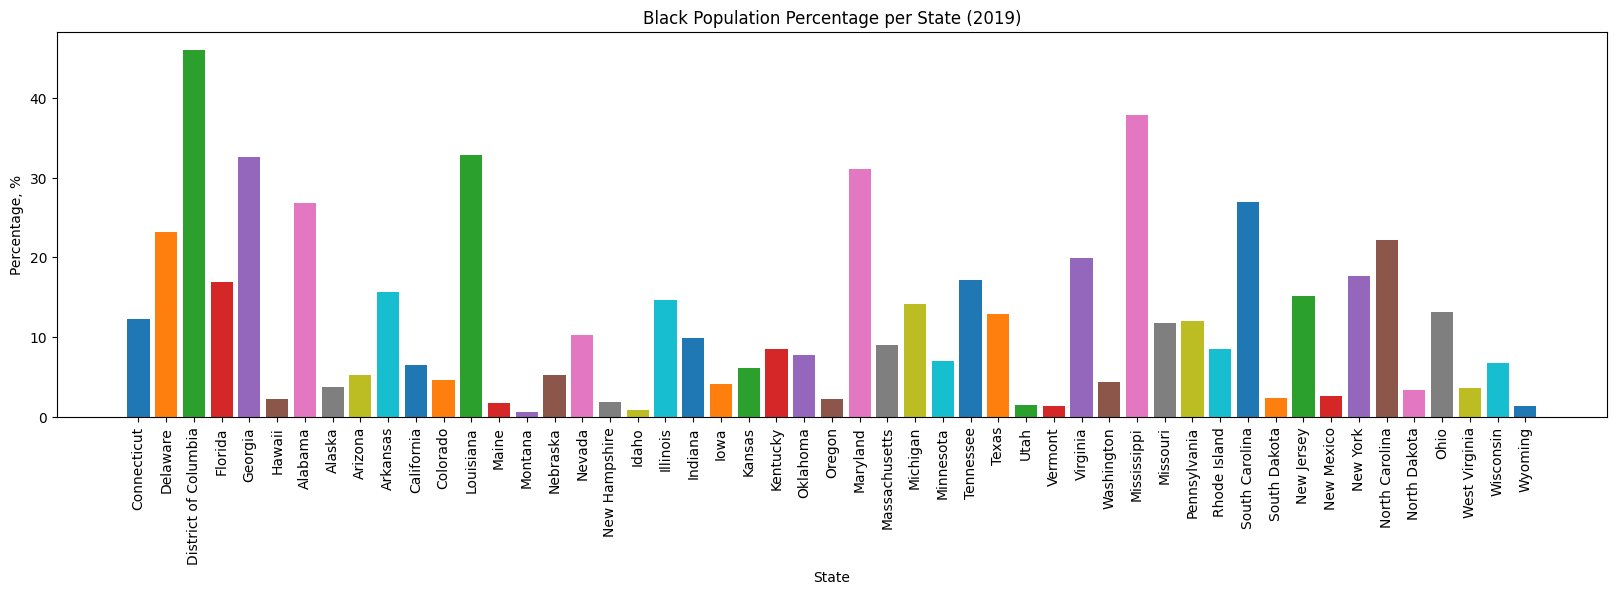

In [6]:
# graphing the percent change in population per state
for idx, row in df_state_demo.iterrows():
            plt.bar(row["State"], row["Ethnicities.Black Alone"])
# labels, sprucing           
plt.xticks(rotation = 90)
plt.title("Black Population Percentage per State (2019)")
plt.xlabel("State")
plt.ylabel("Percentage, %")
plt.gcf().set_size_inches(20, 5)

<hr>

## Methodology

#### **Regression 1**: Black Population Prediction using Historical Population Data
To begin with, we used a polynomial regression model in order to predict the future Black population of each US state based purely on **historical data**. This data is representative of the Black population percentage per state between the years _1790 and 2018_, providing the percentages in 10 year intervals. With this information, we were able to create a 'population percentage predicting' model for each of the 50 states of America. These models were, more than anything, for <span style="color: pink; font-weight: bold;">qualitative curiosity</span>--we were curious to see and understand Black movement over time and space, and extrapolate it to the future. The models helped us to achieve this by generating a **polynomial equation for each state**, for which we then plugged in new 'year' values _(2030, 2040, and 2050)_, to 4 of the states across America--MA, TX, OH, and CA. 
<br><br>
We could, of course, go further, but we thought this was a good start! With this extrapolated data we were then able to extend the _US chloropleth visualization_ seen in the Results section below. However, not only did our model help in achieving that visualization and understanding, but it also provided an interesting contrast to our second model which takes in several features to predict the population percentage (compared to the 1 feature of this model). This raises the interesting question of **Do more features equate to more accuracy?**

<br>

#### **Regression 2**: Feature Importance using State Demographical Data
Our main dataset initially had **46 unique columns/features** excluding the name of the State it was describing and the Black population of that state. A large number of features can definitely be useful at times, other times it may lead to any of the following problems:
- **Overfitting**
- Long computation time
- Large storage capacity required
- etc

Whilst our own dataset is unlikely to run into some of those latter problems, we thought it best practice to still conduct <span style="color: pink; font-weight: bold;">Feature Engineering</span>. To accomplish this, we utilized an ML linear regression model called <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso"><span style="color: pink; font-weight: bold;">Lasso</span></a> which happens to also double as a feature importance 'ranker' of sorts. The full code is located <a href="lasso.ipynb">here</a>, but the high-level summary is that we fit and cross-validated the Lasso model on the aforementioned 46 features and set the **y_feat** as 'Ethnicities. Black Alone' (the Black population percentage). The coefficients the model returned to us represented the weight of importance of each of the 46 features. From there it was as simple as removing all features whose weight was marked as 0, and moving forward with the remaining 27. Why do we trust these weights? Why should _you_ trust these weights?

Because the model is *actually* good... with an **r2 score of 94%**.


<hr>

## Results

### Polynomial Regression Model(s)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

def get_mse(y, y_hat):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_hat - y) ** 2)

# initalizing dictionary for coefficents 
coef_dict = {}

for state in df_pop.columns:
     # skipping Year column
    if state == 'Year':
        continue

    # start index after missing values
    idx = df_pop[state].first_valid_index()
    
    # extracting x & y values
    x = np.array(df_pop.loc[idx: , 'Year']).reshape(-1,1)
    y = np.array(df_pop.loc[idx:, state])

    # ploting observed data
    # uncomment to see plots
    # plt.scatter(x, y, color = 'lightslategrey', label='observed')
    # plt.xlabel('Year')
    # plt.ylabel('Black Population Percentage')

    # process x to polynomial features
    # using the optimal degree
    poly_feat = PolynomialFeatures(degree=2)
    x_poly = poly_feat.fit_transform(x)
    
    # build / fit polynomial model
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_poly, y)
    y_hat = reg.predict(x_poly)
    intercept = reg.intercept_
    mse = get_mse(y, y_hat)
    coef = np.flip(reg.coef_)
    

    # UNCOMMENT BELOW TO SEE PLOTS
    #--------------------------------
    # plots polynomial regression model for every state
    # uncomment to see plots
    # plt.plot(x, y_hat, linewidth=3, color='olive', label='polynomial regression')

    # the title is the coefficients in order, R2 score, and MSE
    # plt.title(f'{state}: {coef} / R2: {round(r2_score(y_true=y, y_pred=y_hat), 4)} / MSE: {round(mse, 4)}')
    # plt.gcf().set_size_inches(10, 5)
    # plt.legend()
    # plt.show()

    # shows each state's coefficients from the regression
    # uncomment work above to see all plots
    coef_dict[state] = coef


print("")
for key, val in coef_dict.items():
    print(f"State: {key}")
    print(f"Equation Coeffs: {val}")
    print("---------------------------")


State: Alabama
Equation Coeffs: [-1.04954997e-03  3.92970827e+00 -3.63619704e+03]
---------------------------
State: Alaska
Equation Coeffs: [-6.32767502e-06  6.36165733e-02 -9.84038338e+01]
---------------------------
State: Arizona
Equation Coeffs: [-6.15297215e-05  2.63920450e-01 -2.77882922e+02]
---------------------------
State: Arkansas
Equation Coeffs: [-1.33883382e-03  5.11635956e+00 -4.86159759e+03]
---------------------------
State: California
Equation Coeffs: [ 1.77171000e-04 -6.37891403e-01  5.73922394e+02]
---------------------------
State: Colorado
Equation Coeffs: [ 1.59204118e-04 -5.93298035e-01  5.53623664e+02]
---------------------------
State: Connecticut
Equation Coeffs: [ 4.55230765e-04 -1.70214577e+00  1.59223223e+03]
---------------------------
State: Delaware
Equation Coeffs: [ 5.74301723e-04 -2.21742709e+00  2.15593323e+03]
---------------------------
State: District of Columbia
Equation Coeffs: [ 1.19657923e-03 -4.41149448e+00  4.09427668e+03]
---------------

### Lasso Model

In [8]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


# loading dataframe
df_state_demo = pd.read_csv('state_demographics.csv')

# only including int/float columns
x_feat_list = list(df_state_demo.columns)
x_feat_list.remove("State")
x_feat_list.remove("Ethnicities.Black Alone") # removing the y_feat

# scale normalization
for feat in x_feat_list:
    df_state_demo[feat] = df_state_demo[feat] / df_state_demo[feat].std()

# setting the x and y values
x = df_state_demo.loc[:, x_feat_list].values
y = df_state_demo.loc[:, "Ethnicities.Black Alone"].values

# initialization of models
lreg = linear_model.Lasso(alpha=0.1) # 0.5 chosen for mid-range penalization 
skfold = KFold(n_splits=20, shuffle=True)

# to store predictions
y_pred = np.empty(y.shape)

# cross validation
for train_idx, test_idx in skfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]

    # fit Lasso on training set
    lreg.fit(x_train, y_train)

    # predicting
    y_pred[test_idx] = lreg.predict(x_test)

mse = np.mean((y_pred - y) ** 2)
r2 = r2_score(y, y_pred)

#-----------------------------------------------------------------------------

# Now doing it on the full dataset
# fitting the model
lreg.fit(x,y)

# # coefficients 
lreg_coefs = list(lreg.coef_)

# # to store feature/coef pairs
answer_dict = {}

for lreg_coef, x_feat in zip(lreg_coefs, x_feat_list):
    # only keeping features whose coefficient is of value (i.e not 0)
    if (lreg_coef != 0):
        answer_dict[x_feat] = lreg_coef

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MSE: 6.269973787162502
R2 Score: 0.944182666021623


<hr>

## Visualizations

In [9]:
from visualscode import *

#### 1. Black Population Percentage by State

In [10]:
# Press the play button to see the visualization change 
make_states_visual()

#### 2. Feature Correlation
N.B due to size limits, not all features are able to be seen in the correlation graphs <3

c:\Users\amand\Desktop\DS2500\Homeworks\Data Analysis & Plan\visualscode.py:235: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



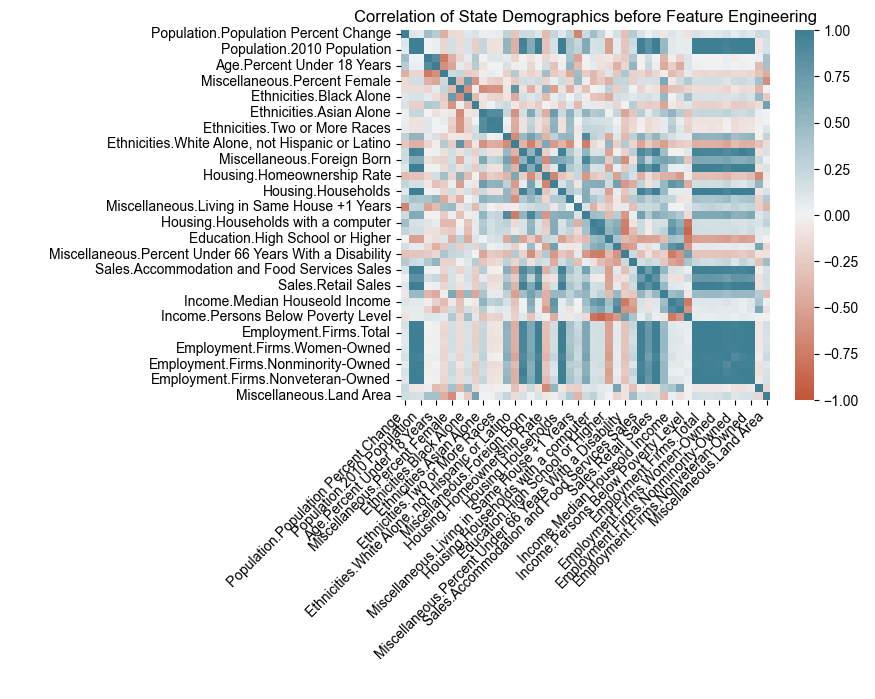

In [11]:
# Feature Correlation before Feature Engineering
feat_corr_before()

c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.123e+01, tolerance: 5.510e-01

c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.123e+01, tolerance: 5.579e-01

c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+01,

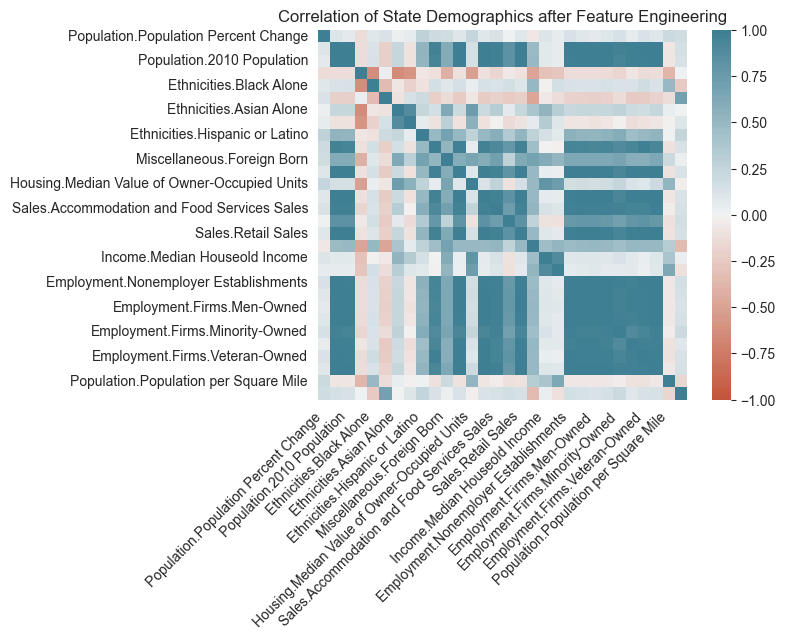

In [12]:
# Feature Correlation after Feature Engineering
feat_corr_after()

<hr>

## Discussion

<img src="keys.png" style="width: 500px;"/>

In our “Percent of Black Population by State (1790-2050)” visualization, from about 1790-1880 there are a large number of states that have “unknown” statistics for Black people. We hypothesized that it could be a combination of future-to-be states not being instantiated yet and or those specific states not having a census for Black people at the time. 

Our visualization also brought up a continuation in the trend of where Black persons are located more in Southeast states than in Midwest states. This observation was further cemented when we extrapolated the data and saw the Black population percentage measured around 31-40% in Southeast states, whereas it was only 11-20% in more historically white states.
 
These results were in no fashion ground-breaking. Initially, we had columns in our dataset that dealt with racial groups, for example: “Ethnicities.White Alone”. Similar columns are obviously negatively correlated with the presence of Black people in a state. After stripping the columns that included race, we found the columns that had the most important were the Number of Minority-Owned Firms, Median Household Income, and Population per Square mile. These results are not groundbreaking in any fashion, Black people historically tend to live near other Black people which explains that first feature importance. Diving deeper, these results should not be accepted at face value. Folks that mistakenly take our results at face value may fail to take into consideration the larger problem relating to America's historic race issue. It is very important to note that this issue should be evaluated in the context of the housing issue in America, stemming from America’s systemic race issue. 
 
As we saw in HW5, people of color are more likely to live in residential areas that are not ideal in many fashions. We found that the most ethical implication was not really a result of our project but more so influenced it and potential projects to come. That being where Black people are right now is not necessarily where they want to live. In future projects, we would figure out a way to section off Black people that live in places out of necessity vs Black people that live in places out of actual want.  
 
In general, and looking forward, data surrounding the Black experience is significantly unjustly harder to come by which makes projects like these increasingly complex. It is very important that projects about the Black experience in America can be backed in full by complete datasets in the future.
